# Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import geopy.distance
import os
import plotly.graph_objects as go
from shapely.geometry import shape, Point
import seaborn as sns
import matplotlib as mpl
import folium
import re
import seaborn as sns
from datetime import datetime
import pytz
from pytz import timezone

# Read File

In [15]:
df = pd.read_csv('Session-Details-Summary-20231129.csv') 


## Convert Start and End Date to EST Time Zone

In [16]:
unique_values_time_zone = df['Start Time Zone'].unique()
print(unique_values_time_zone)

['EST' 'CST' 'CDT' 'EDT' 'PDT']


In [61]:
# Convert Start and End Date to datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

def convert_to_est(row, date_col, tz_col):
    tz_map = {'EST': 'America/New_York', 'CST': 'America/Chicago', 'CDT': 'America/Chicago', 'EDT': 'America/New_York', 'PDT': 'America/Los_Angeles'}
    return row[date_col].tz_localize(tz=tz_map[row[tz_col]], ambiguous='NaT').tz_convert(tz='EST')


# Apply function to Start and End Date
df['Start_Time_EST'] = df.apply(convert_to_est, args=('Start Date', 'Start Time Zone'), axis=1)
df['End_Time_EST'] = df.apply(convert_to_est, args=('End Date', 'End Time Zone'), axis=1)

In [18]:
missing_count = df['Port Type'].value_counts().get('Missing', 0)
print(f"Number of missing values in 'Port Type': {missing_count}")

#df['Port Type'] = df['Port Type'].fillna('Missing')

Number of missing values in 'Port Type': 0


In [19]:
# Assuming df is your DataFrame
unique_values_port_type = df['Port Type'].unique()

# Count occurrences of each unique value
port_type_counts = df['Port Type'].value_counts()

# Print unique values
print("Unique Values:", unique_values_port_type)

# Print counts of each unique value
print("Number of charging events")
print(port_type_counts)


Unique Values: ['DC Fast' 'Level 2' nan]
Number of charging events
Port Type
DC Fast    9124
Level 2    7131
Name: count, dtype: int64


In [20]:
unique_values_MAC_address=df["MAC Address"].unique()
MAC_Address_counts=df["MAC Address"].value_counts()
print(unique_values_MAC_address)

print(MAC_Address_counts)

['0024:B100:0008:106D' '0024:B100:0004:C84D' '0024:B100:0004:721A'
 '0024:B100:0008:168E' '0024:B100:0008:1355' '0024:B100:0008:0AE7'
 '0024:B100:0008:14C0' '0024:B100:0008:166B' '0024:B100:0008:1011'
 '0024:B100:0004:035D' '0024:B100:0001:1A52' '0024:B100:0006:D361'
 '0024:B100:0008:0B14' '0024:B100:000B:90A1' '0024:B100:0008:04A6'
 '0024:B100:0008:163D' '0024:B100:0008:116E' '0024:B100:0008:156C'
 '0024:B100:0008:1850' '0024:B100:000B:CB0D' '0024:B100:0001:1978'
 '0024:B100:0001:19F5' '0024:B100:0003:9AE3' '0024:B100:0001:2002'
 '0024:B100:0008:0D15' '0024:B100:0004:1E0B' '0024:B100:000C:EC0A'
 '0024:B100:0001:1599' '0024:B100:0008:07E6' '0024:B100:0003:8A44'
 '0024:B100:0001:1FF5' '0024:B100:0001:1EE1' '0024:B100:0003:D7DA'
 '0024:B100:0003:8A17' '0024:B100:0008:1375' '0024:B100:0004:37E5'
 '0024:B100:000B:93E7' '0024:B100:0004:697C' '0024:B100:0003:F0BC'
 '0024:B100:0001:172A' '0024:B100:0008:135A' '0024:B100:0001:1EA0'
 '0024:B100:0008:0C00' '0024:B100:0008:075E' '0024:B100:0008:0

In [21]:
# Count the number of unique MAC addresses for each charging station
mac_counts = df.groupby('Station Name')['MAC Address'].nunique()

# Sort in descending order
sorted_mac_counts = mac_counts.sort_values(ascending=False)

# Display the top 30
top_30 = sorted_mac_counts.head(30)

# Print the result
print(top_30)

Station Name
CLW / MAIN ST                        3
HARTSELLE 1 / HARTSELLE 1            2
PES / RIGHT STATION                  2
BRIGHTRIDGE EV / BR-JC LIBRARY       2
STARKVILLE UTIL / STARKVILLE DWTN    2
LAWRENCEBURG / STATION 1             1
JEFFERSON AVE. / OXFORD STA2(R)      1
JEFFERSON AVE. / OXFORD STA1(L)      1
I24 EXIT11 / STATION 4 (RR)          1
I24 EXIT11 / STATION 3 (RM)          1
I24 EXIT11 / STATION 2 (LM)          1
I24 EXIT11 / STATION 1 (LL)          1
7SPC / CFEC SPENCER                  1
HOLSTONELECTRIC / STATION 1          1
LAWRENCEBURG / STATION 2 (R)         1
FPIA / RIGHT STATION                 1
FPIA / LEFT STATION                  1
EBOFG / GUNTERSVILLE PD              1
EASY AUTO / SHOP1                    1
EASY AUTO / OFFICE1                  1
DISTRICT 2 / STATION 2 (R)           1
DISTRICT 2 / STATION 1 (L)           1
LAWRENCEBURG / STATION 1 (L)         1
MU / MUC MAIN OFFICE                 1
LODGE CAST IRON / STORE & MUSEUM     1
SCOTTSBORO E

In [22]:
missing_values = df.isnull().sum()

print(missing_values)

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               7
End Time Zone                          0
Transaction Date (Pacific Time)       42
Total Duration                         0
Charging Time                          0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                           1090
Port Number                            0
Plug Type                           1090
EVSE ID                                0
Address 1                              0
Address 2                          16447
City                                   0
State/Province                         0
Zip/Postal Code                        0
Country                                0
Latitude                               0
Longitude       

In [23]:
missing_count_NaN = df.isna().sum()
print(missing_count_NaN)

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               7
End Time Zone                          0
Transaction Date (Pacific Time)       42
Total Duration                         0
Charging Time                          0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                           1090
Port Number                            0
Plug Type                           1090
EVSE ID                                0
Address 1                              0
Address 2                          16447
City                                   0
State/Province                         0
Zip/Postal Code                        0
Country                                0
Latitude                               0
Longitude       

In [24]:
df=df.dropna(subset=["Port Type"])

In [25]:
df["State/Province"].value_counts()

State/Province
Tennessee      7899
Alabama        5189
Mississippi    1589
Kentucky       1092
Georgia         486
Name: count, dtype: int64

In [26]:
# Sample mapping dictionary
state_mapping = {
    'Tennessee': 'TN',
    'Alabama': 'AL',
    'Mississippi': 'MS',
    'Kentucky': 'KY',
    'Georgia': 'GA',
    
}

# Create a new column with state codes
df['State Code'] = df['State/Province'].map(state_mapping)

# Assuming state_counts is calculated using df["State Code"].value_counts()
state_counts = df["State Code"].value_counts()

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=state_counts.index,
    z=state_counts.values.astype(float),
    locationmode="USA-states",
    colorscale="turbo",
))

# Update layout
fig.update_layout(
    title_text="Number of Occurrences by State",
    geo_scope="usa",
)

# Show the map in the default renderer (browser)
fig.show()




# Separate df with Level2 (L2) and Fast charging (DC)

In [62]:
df_L2 = df[(df['Port Type'].str.fullmatch('Level 2'))]

df_DC = df[(df['Port Type'].str.fullmatch('DC Fast'))]

In [63]:
df_L2

Station Name          MAC Address  \
1      UT PARKING / S7 STATION 1  0024:B100:0004:C84D   
2          7SPC / WARREN RECC LF  0024:B100:0004:721A   
9           7SPC / UC - CARTHAGE  0024:B100:0004:035D   
11           EASY AUTO / OFFICE1  0024:B100:0006:D361   
15     HARTSELLE 1 / HARTSELLE 1  0024:B100:000B:90A1   
...                          ...                  ...   
17333        EASY AUTO / OFFICE1  0024:B100:0006:D361   
17334        7SPC / NASA USSRC L  0024:B100:0004:595E   
17335        7SPC / NASA USSRC L  0024:B100:0004:595E   
17336        7SPC / NASA USSRC L  0024:B100:0004:595E   
17341       MU / MUC MAIN OFFICE  0024:B100:0006:D26A   

                              Org Name          Start Date Start Time Zone  \
1                         UT Knoxville 2023-11-29 13:15:00             EST   
2       Seven States Power Corporation 2023-11-29 11:44:00             CST   
9       Seven States Power Corporation 2023-11-29 12:52:00             CST   
11                           Easy Auto 2023-11-29 08:48:00             EST   
15                 Hartselle Utilities 2023-11-29 12:07:00             CST   
...                                ...                 ...             ...   
17333                        Easy Auto 2023-11-29 14:23:00             EST   
17334   Seven States Power Corporation 2023-01-29 11:34:00             CST   
17335   Seven States Power Corporation 2023-07-01 18:08:00             CDT   
17336   Seven States Power Corporation 2023-08-19 09:48:00             CDT   
17341  Morristown Utilities Commission 2023-11-29 13:01:00             EST   

                 End Date End Time Zone Transaction Date (Pacific Time)  \
1     2023-11-29 15:05:00           EST                11/29/2023 12:07   
2     2023-11-29 14:01:00           CST                11/29/2023 12:03   
9     2023-11-29 13:26:00           CST                11/29/2023 11:27   
11    2023-11-29 14:04:00           EST                11/29/2023 11:04   
15    2023-11-29 12:31:00           CST                11/29/2023 10:32   
...                   ...           ...                             ...   
17333                 NaT           EST                             NaN   
17334 2023-02-08 18:19:00           CST                             NaN   
17335 2023-07-02 07:17:00           CDT                             NaN   
17336 2023-08-19 05:45:00           CDT                             NaN   
17341                 NaT           EST                             NaN   

      Total Duration Charging Time  ...       Model Number  OnRamp ID Tag  \
1            1:50:21       1:49:52  ...       CT4020-HD-GW            NaN   
2            2:17:34       2:17:18  ...       CT4020-HD-GW            NaN   
9            0:33:32       0:33:16  ...       CT4020-HD-GW            NaN   
11           5:16:26       2:12:46  ...       CT4020-HD-GW            NaN   
15           0:24:03       0:23:47  ...  CT4020-HD2-GW-LTE            NaN   
...              ...           ...  ...                ...            ...   
17333        1:00:23       0:44:09  ...       CT4020-HD-GW            NaN   
17334        0:01:23       0:00:19  ...       CT4020-HD-GW            NaN   
17335        1:44:29       1:44:05  ...       CT4020-HD-GW            NaN   
17336        0:57:48       0:57:32  ...       CT4020-HD-GW            NaN   
17341        2:20:06       1:45:09  ...       CT4020-HD-GW            NaN   

       Payment Terminal Session ID Vehicle MAC ID            Start_Time_EST  \
1                              NaN            NaN 2023-11-29 13:15:00-05:00   
2                              NaN            NaN 2023-11-29 12:44:00-05:00   
9                              NaN            NaN 2023-11-29 13:52:00-05:00   
11                             NaN            NaN 2023-11-29 08:48:00-05:00   
15                             NaN            NaN 2023-11-29 13:07:00-05:00   
...                            ...            ...                       ...   
17333              

DC Fast: 9124
Level 2: 7131


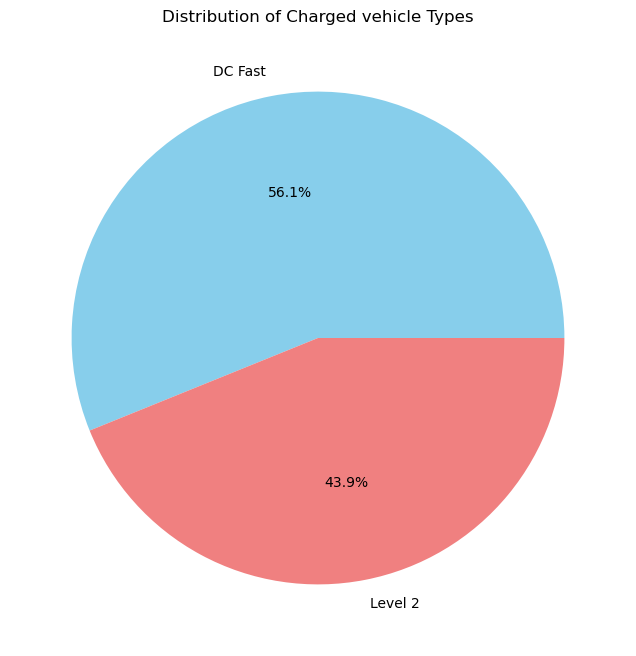

In [29]:
# Count the number of Level 2 and DC Fast charging stations
count_by_port_type = df['Port Type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
count_by_port_type.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Charged vehicle Types')
plt.ylabel('')  # Remove the default ylabel

# Print the count of Level 2 and DC Fast charging stations
for port_type, count in count_by_port_type.items():
    print(f"{port_type}: {count}")

plt.show()

In [30]:
df_L2.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration', 'Charging Time',
       'Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)',
       'Port Type', 'Port Number', 'Plug Type', 'EVSE ID', 'Address 1',
       'Address 2', 'City', 'State/Province', 'Zip/Postal Code', 'Country',
       'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event ID', 'Transaction ID', 'Driver Zip/Postal Code',
       'User ID', 'Start SOC', 'End SOC', 'County', 'System S/N',
       'Model Number', 'OnRamp ID Tag', 'Payment Terminal Session ID',
       'Vehicle MAC ID', 'Start_Time_EST', 'End_Time_EST', 'State Code'],
      dtype='object')

In [31]:
def convert_duration_to_seconds(duration):
    if isinstance(duration, str):
        parts = duration.split(':')
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = int(parts[2].split()[0])  # Extract seconds and ignore 'AM' or 'PM'
        total_seconds = hours * 3600 + minutes * 60 + seconds
        return total_seconds
    elif isinstance(duration, datetime.time):
        return duration.hour * 3600 + duration.minute * 60 + duration.second
    else:
        return 0  # Handle other cases if needed

# Assuming 'Total Duration' is in string format '1:26:32 AM'
df_L2['Total Duration'] = df_L2['Total Duration'].apply(convert_duration_to_seconds)
df_DC['Total Duration'] = df_DC['Total Duration'].apply(convert_duration_to_seconds) 


C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\2106448130.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\2106448130.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
df

Station Name          MAC Address  \
0             BRMEMC / STATION 2  0024:B100:0008:106D   
1      UT PARKING / S7 STATION 1  0024:B100:0004:C84D   
2          7SPC / WARREN RECC LF  0024:B100:0004:721A   
3           BEA / STATION 1 (LL)  0024:B100:0008:168E   
4       PARIS BPU / STATION 2(R)  0024:B100:0008:1355   
...                          ...                  ...   
17340         BRMEMC / STATION 2  0024:B100:0008:106D   
17341       MU / MUC MAIN OFFICE  0024:B100:0006:D26A   
17342      STEMC / STATION 1 (L)  0024:B100:0008:0BE1   
17343      STEMC / STATION 1 (L)  0024:B100:0008:0BE1   
17344      STEMC / STATION 1 (L)  0024:B100:0008:0BE1   

                                                Org Name          Start Date  \
0      Blue Ridge Mountain Electric Membership Corpor... 2023-11-29 14:17:00   
1                                           UT Knoxville 2023-11-29 13:15:00   
2                         Seven States Power Corporation 2023-11-29 11:44:00   
3                           Brownsville Energy Authority 2023-11-29 13:16:00   
4                                Paris Utility Authority 2023-11-29 13:23:00   
...                                                  ...                 ...   
17340  Blue Ridge Mountain Electric Membership Corpor... 2023-10-19 14:03:00   
17341                    Morristown Utilities Commission 2023-11-29 13:01:00   
17342  Southwest Tennessee Electric Membership Corpor... 2023-10-07 23:35:00   
17343  Southwest Tennessee Electric Membership Corpor... 2023-10-07 23:52:00   
17344  Southwest Tennessee Electric Membership Corpor... 2023-10-08 00:23:00   

      Start Time Zone            End Date End Time Zone  \
0                 EST 2023-11-29 15:24:00           EST   
1                 EST 2023-11-29 15:05:00           EST   
2                 CST 2023-11-29 14:01:00           CST   
3                 CST 2023-11-29 13:52:00           CST   
4                 CST 2023-11-29 13:50:00           CST   
...               ...                 ...           ...   
17340             EDT 2023-10-19 14:53:00           EDT   
17341             EST                 NaT           EST   
17342             CDT 2023-10-07 23:45:00           CDT   
17343             CDT 2023-10-08 00:06:00           CDT   
17344             CDT 2023-10-08 00:34:00           CDT   

      Transaction Date (Pacific Time) Total Duration Charging Time  ...  \
0                    11/29/2023 12:24        1:07:22       1:06:32  ...   
1                    11/29/2023 12:07        1:50:21       1:49:52  ...   
2                    11/29/2023 12:03        2:17:34       2:17:18  ...   
3                    11/29/2023 11:52        0:36:20       0:35:19  ...   
4                    11/29/2023 11:50        0:27:05       0:26:58  ...   
...                               ...            ...           ...  ...   
17340                             NaN        0:50:13       0:48:30  ...   
17341                             NaN        2:20:06       1:45:09  ...   
17342                             NaN        0:09:27       0:06:45  ...   
17343                             NaN        0:14:45       0:11:59  ...   
17344                             NaN        0:10:43       0:08:50  ...   

       End SOC          County    System S/N          Model Number  \
0          80%    Union County  2.303150e+11  CPE250C-500-CCS1-CHD   
1          NaN     Knox County  2.112410e+11          CT4020-HD-GW   
2          NaN  Grayson County  2.043410e+11          CT4020-HD-GW   
3          80%  Haywood County  2.308140e+11  CPE250C-500-CCS1-CHD   
4          75%    Henry County  2.304140e+11  CPE250C-500-CCS1-CHD   
...        ...             ...           ...                   ...   
17340      93%    Union County  2.303150e+11         CPE250C-500--   
17341      NaN             NaN  2.203410e+11          CT4020-HD-GW   
17342      36%  Chester County  2.243140e+11     CPE250C-500-CCS1-   
17343      52%  Chester County  2.243140e+11     CPE250C-500-CCS

In [33]:
# For DC fast charging sites
df_DC['Total Duration'] = pd.to_numeric(df_DC['Total Duration'], errors='coerce')
df_DC['Energy (kWh)'] = pd.to_numeric(df_DC['Energy (kWh)'], errors='coerce')
df_DC['Fee'] = pd.to_numeric(df_DC['Fee'], errors='coerce')

DC_usage = df_DC.groupby('Station Name').agg({
    'Total Duration': ['count', 'mean'],
    'Energy (kWh)': ['sum', 'mean'],
    'Fee': ['sum', 'mean']
}).reset_index()

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\3556221534.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\3556221534.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\3556221534.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [34]:
DC_usage

Station Name Total Duration              Energy (kWh)  \
                                             count         mean          sum   
0             7SPC / GREENEVILLE TA            423  1830.059102     8717.592   
1            7SPC / SEVIERVILLE DC1           1049  2316.593899    25398.308   
2              7SPC / TTU DC FAST 1            362  2304.906077     8719.875   
3              AEC / STATION #1 (L)            108  1708.333333     2403.161   
4              AEC / STATION #2 (R)             84  1906.202381     2175.291   
5              BEA / STATION 1 (LL)             60  2733.850000     1878.626   
6              BEA / STATION 2 (LM)             55  1845.818182     1589.351   
7              BEA / STATION 3 (RM)             73  1863.397260     1663.520   
8              BEA / STATION 4 (RR)             61  2025.918033     1858.868   
9                BRMEMC / STATION 1            209  1841.540670     5381.340   
10               BRMEMC / STATION 2            277  1636.729242     6849.915   
11            BTES / STATION 1 (LL)             82  2223.365854     2295.294   
12            BTES / STATION 2 (LM)             67  2107.164179     2033.610   
13            BTES / STATION 3 (RM)            125  2191.336000     3278.860   
14            BTES / STATION 4 (RR)            106  2221.028302     2689.786   
15     CULLMANELECTRIC / STATION1-L            837  1400.292712    16966.980   
16     CULLMANELECTRIC / STATION2-R            600  1432.285000    12447.564   
17      DISTRICT 2 / STATION #1 (L)              4  3272.500000      111.200   
18       DISTRICT 2 / STATION 1 (L)             54  1758.685185     1185.777   
19       DISTRICT 2 / STATION 2 (R)             47  1770.425532      768.974   
20              FPIA / LEFT STATION            652  1619.142638    12919.485   
21             FPIA / RIGHT STATION            721  1785.456311    16268.066   
22      I24 EXIT11 / STATION 1 (LL)             92  1583.771739     1894.839   
23      I24 EXIT11 / STATION 2 (LM)            124  1719.846774     3201.400   
24      I24 EXIT11 / STATION 3 (RM)            207  1643.961353     4203.507   
25      I24 EXIT11 / STATION 4 (RR)            323  1928.699690     7573.084   
26  JEFFERSON AVE. / OXFORD STA1(L)            107  2313.971963     3051.869   
27  JEFFERSON AVE. / OXFORD STA2(R)            111  2548.927928     3628.496   
28         LAWRENCEBURG / STATION 1              1  3213.000000       40.171   
29     LAWRENCEBURG / STATION 1 (L)            112  1594.562500     2380.011   
30     LAWRENCEBURG / STATION 2 (R)            142  1621.359155     3280.789   
31         PARIS BPU / STATION 1(L)             39  2639.487179     1059.338   
32         PARIS BPU / STATION 2(R)             36  1988.416667      918.398   
33                 PEPA / STATION 1            210  2343.509524     7991.129   
34                 PEPA / STATION 2            140  2112.542857     4587.930   
35   SCOTTSBORO EPB / SEPB DCFC (L)             42  2237.000000      804.166   
36   SCOTTSBORO EPB / SEPB DCFC (R)             47  2160.340426     1202.942   
37            STEMC / STATION 1 (L)             36  1897.638889      355.912   
38            STEMC / STATION 2 (R)             31  1976.032258      719.334   
39              WCMES / CITYHALL1-L            175  2059.234286     4907.310   
40              WCMES / CITYHALL2-R            221  2280.950226     6921.221   
41                WRECC / STATION 1            255  1935.352941     7773.463   
42                WRECC / STATION 2            617  1902.270665    18730.735   

                   Fee             
         mean      sum       mean  
0   20.608965  3430.88   8.110827  
1   24.211924  8660.62   8.256072  
2   24.088052  2226.27   6.149917  
3   22.251491  1009.30   9.345370  
4   25.896321   913.66  10.876905  
5   31.310433   789.08  13.151333  
6   28.897291   667.54  12.137091  
7   22.787945   698.69   9.571096  
8   30.473246   780.74  12.799016  
9   25.748038  2260.16  10

In [35]:
# For L2 fast charging sites
df_L2['Total Duration'] = pd.to_numeric(df_L2['Total Duration'], errors='coerce')
df_L2['Energy (kWh)'] = pd.to_numeric(df_L2['Energy (kWh)'], errors='coerce')
df_L2['Fee'] = pd.to_numeric(df_L2['Fee'], errors='coerce')

L2_usage = df_L2.groupby('Station Name').agg({
    'Total Duration': ['count', 'mean'],
    'Energy (kWh)': ['sum', 'mean'],
    'Fee': ['sum', 'mean']
}).reset_index()


C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\3182332745.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\3182332745.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\3182332745.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [36]:
L2_usage

Station Name Total Duration                 \
                                               count           mean   
0                 7SPC / CFEC SPENCER             22    3230.136364   
1               7SPC / DOLLYWOOD EMPL             51    7437.490196   
2                 7SPC / NASA USSRC L            469    8628.441365   
3                 7SPC / NASA USSRC R            526    8887.933460   
4               7SPC / SCES DOLLYWOOD            379   16064.894459   
5              7SPC / SCES DREAM MORE            434   14764.557604   
6               7SPC / SCES LECONTE 1             43   10280.116279   
7               7SPC / SCES LECONTE 2             28   10025.035714   
8               7SPC / SCES LECONTE 3             41    9851.585366   
9               7SPC / SCES LECONTE 4            112   10525.982143   
10                  7SPC / SMITHVILLE             65   21122.846154   
11                   7SPC / SPARTA TN             54    6120.666667   
12              7SPC / TRI-COUNTY EMC             28    6910.642857   
13                7SPC / TVPPA OFFICE            207   16039.227053   
14               7SPC / UC - CARTHAGE            166   32326.656627   
15             7SPC / UC - LIVINGSTON            102   11499.911765   
16               7SPC / VEC BYRDSTOWN             22    4368.863636   
17               7SPC / VEC JAMESTOWN             28    5246.714286   
18              7SPC / WARREN RECC BG            184   12443.826087   
19              7SPC / WARREN RECC LF             36    4248.638889   
20                  AEC / CORP OFFICE            130   13949.684615   
21     BRIGHTRIDGE EV / BR-JC LIBRARY            309    7264.265372   
22   BRIGHTRIDGE EV / BR-JONESBOROUGH            223    7419.695067   
23                 BTES / BTES OFFICE             23    3452.826087   
24                   BTES / CITY HALL            102   13093.088235   
25                      CLW / MAIN ST            406   10533.086207   
26             CRMC / CRMC-1 - L2LEFT             68   14242.926471   
27             CRMC / CRMC-2- L2RIGHT             31   10956.935484   
28             CULLMAN PB / STATION 1            169   13870.928994   
29  CULLMANELECTRIC / CEC MAIN OFFICE            115   31907.817391   
30                EASY AUTO / OFFICE1            160   15966.237500   
31                  EASY AUTO / SHOP1             19   24352.947368   
32            EBOFG / GUNTERSVILLE PD            542   12448.981550   
33          HARTSELLE 1 / HARTSELLE 1            219    6920.735160   
34        HOLSTONELECTRIC / STATION 1             38   17759.368421   
35   LODGE CAST IRON / STORE & MUSEUM            210    4244.319048   
36               MU / MUC MAIN OFFICE             28   10687.178571   
37               MU / MUC PWRENG BLDG             21   28524.952381   
38           NEMEPA / NEMEPA CUSTOMER             85    6121.600000   
39           NEMEPA / NEMEPA EMPLOYEE             19   52602.315789   
40                 PES / LEFT STATION            102  104103.156863   
41                PES / RIGHT STATION              9  185595.222222   
42       SCOTTSBORO EPB / MAIN OFFICE            151    4358.788079   
43  STARKVILLE UTIL / STARKVILLE DWTN            374    9481.165775   
44   STARKVILLE UTIL / STARKVILLE REC            137    8356.620438   
45          UT PARKING / S7 STATION 1            444    8857.398649   

   Energy (kWh)                 Fee             
            sum       mean      sum       mean  
0       125.490   5.704091    20.45   0.929545  
1       506.005   9.921667   106.28   2.083922  
2      5501.667  11.730633  1158.58   2.470320  
3      6638.512  12.620745  1359.78   2.585133  
4      8392.357  22.143422  1905.27   5.027098  
5      7673.922  17.681848  2017.35   4.648272  
6       748.454  17.405907   127.57   2.966744  
7       446.361  15.941464    78.29   2.796071  
8       563.392  13.741268   124.61   3.039268  
9      1813.529  16.192223   346.15   3.090625  
10      870.949  13.399215  

# Total vehicles Chrging Type 

In [37]:
value_counts_station_name= df["Station Name"].value_counts()
unique_values_column_station_name = df['Station Name'].unique()


print(value_counts_station_name)
#print(unique_values_column_station_name)

Station Name
7SPC / SEVIERVILLE DC1          1049
CULLMANELECTRIC / STATION1-L     837
FPIA / RIGHT STATION             721
FPIA / LEFT STATION              652
WRECC / STATION 2                617
                                ... 
NEMEPA / NEMEPA EMPLOYEE          19
EASY AUTO / SHOP1                 19
PES / RIGHT STATION                9
DISTRICT 2 / STATION #1 (L)        4
LAWRENCEBURG / STATION 1           1
Name: count, Length: 89, dtype: int64


In [38]:
value_counts_User_name= df["User ID"].value_counts()
print(value_counts_User_name)

User ID
35312191    281
23114351    149
39956041    146
36794241    112
32776001    102
           ... 
26440881      1
41985881      1
22322151      1
41974371      1
25881291      1
Name: count, Length: 4400, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '35312191'),
  Text(1, 0, '23114351'),
  Text(2, 0, '39956041'),
  Text(3, 0, '36794241'),
  Text(4, 0, '32776001'),
  Text(5, 0, '31948601'),
  Text(6, 0, '26789031'),
  Text(7, 0, '345831V'),
  Text(8, 0, '21698361'),
  Text(9, 0, '34108791'),
  Text(10, 0, '2577471'),
  Text(11, 0, '31321161'),
  Text(12, 0, '27405401'),
  Text(13, 0, '28493451'),
  Text(14, 0, '35914251'),
  Text(15, 0, '19948981'),
  Text(16, 0, '28519711'),
  Text(17, 0, '33864851'),
  Text(18, 0, '33732041'),
  Text(19, 0, '36564161'),
  Text(20, 0, '24517611'),
  Text(21, 0, '30255411'),
  Text(22, 0, '35649101'),
  Text(23, 0, '36839191'),
  Text(24, 0, '30969821'),
  Text(25, 0, '22460041'),
  Text(26, 0, '25211751'),
  Text(27, 0, '35255021'),
  Text(28, 0, '41653461'),
  Text(29, 0, '33545831')])

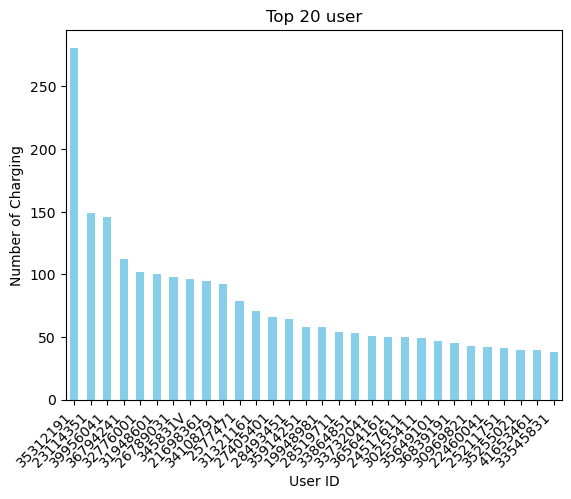

In [39]:
top_30_users = value_counts_User_name.sort_values(ascending=False).head(30)

figsize=(10, 6)
top_30_users.plot(kind='bar', color='skyblue')
plt.title('Top 20 user')
plt.xlabel('User ID')
plt.ylabel('Number of Charging')
plt.xticks(rotation=45, ha='right')

In [40]:
unique_vehicles_per_station = df.groupby('Station Name')['User ID'].nunique()
print (unique_vehicles_per_station)

Station Name
7SPC / CFEC SPENCER           13
7SPC / DOLLYWOOD EMPL         16
7SPC / GREENEVILLE TA        165
7SPC / NASA USSRC L          252
7SPC / NASA USSRC R          239
                            ... 
UT PARKING / S7 STATION 1     96
WCMES / CITYHALL1-L           44
WCMES / CITYHALL2-R           50
WRECC / STATION 1            109
WRECC / STATION 2            192
Name: User ID, Length: 89, dtype: int64


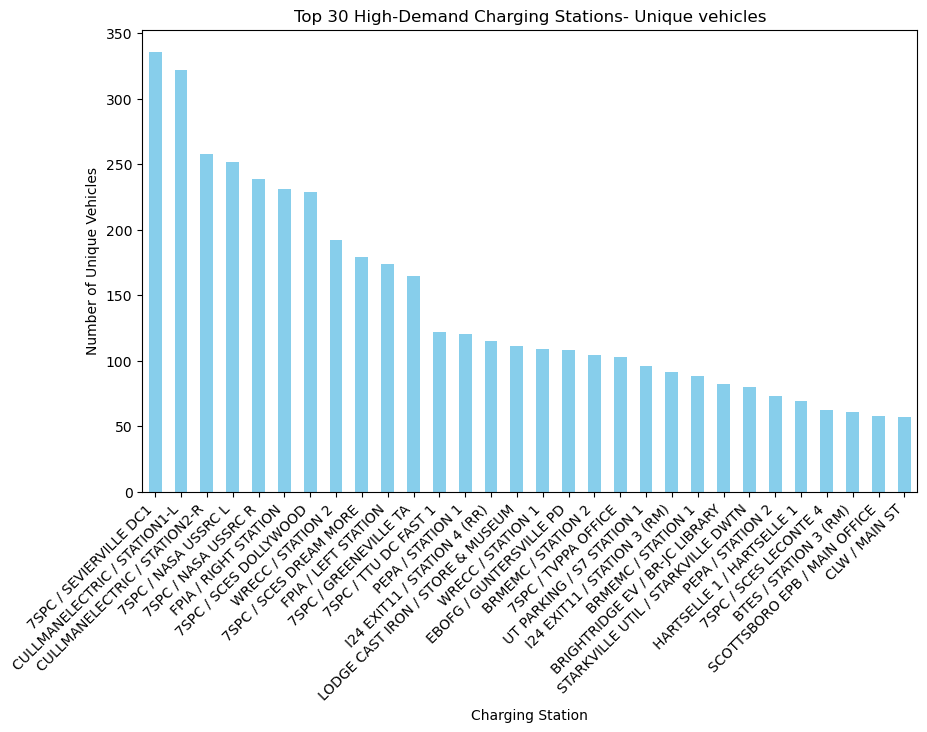

In [43]:
# Assuming 'unique_vehicles_per_station' is the Series you obtained
top_30_stations = unique_vehicles_per_station.sort_values(ascending=False).head(30)

# Plotting
plt.figure(figsize=(10, 6))
top_30_stations.plot(kind='bar', color='skyblue')
plt.title('Top 30 High-Demand Charging Stations- Unique vehicles')
plt.xlabel('Charging Station')
plt.ylabel('Number of Unique Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()


# Unique vehicle DC

In [44]:
value_counts_station_name_DC= df_DC["Station Name"].value_counts()
unique_values_column_station_name_DC = df_DC['Station Name'].unique()


print(value_counts_station_name_DC)

Station Name
7SPC / SEVIERVILLE DC1             1049
CULLMANELECTRIC / STATION1-L        837
FPIA / RIGHT STATION                721
FPIA / LEFT STATION                 652
WRECC / STATION 2                   617
CULLMANELECTRIC / STATION2-R        600
7SPC / GREENEVILLE TA               423
7SPC / TTU DC FAST 1                362
I24 EXIT11 / STATION 4 (RR)         323
BRMEMC / STATION 2                  277
WRECC / STATION 1                   255
WCMES / CITYHALL2-R                 221
PEPA / STATION 1                    210
BRMEMC / STATION 1                  209
I24 EXIT11 / STATION 3 (RM)         207
WCMES / CITYHALL1-L                 175
LAWRENCEBURG / STATION 2 (R)        142
PEPA / STATION 2                    140
BTES / STATION 3 (RM)               125
I24 EXIT11 / STATION 2 (LM)         124
LAWRENCEBURG / STATION 1 (L)        112
JEFFERSON AVE. / OXFORD STA2(R)     111
AEC / STATION #1 (L)                108
JEFFERSON AVE. / OXFORD STA1(L)     107
BTES / STATION 4 (RR)      

In [45]:
value_counts_User_name_DC= df_DC["User ID"].value_counts()
print(value_counts_User_name_DC)

User ID
35312191    280
23114351    149
28519711     54
33864851     53
36564161     50
           ... 
41048771      1
24211171      1
44087531      1
25168341      1
30478991      1
Name: count, Length: 2587, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '35312191'),
  Text(1, 0, '23114351'),
  Text(2, 0, '28519711'),
  Text(3, 0, '33864851'),
  Text(4, 0, '36564161'),
  Text(5, 0, '24517611'),
  Text(6, 0, '25211751'),
  Text(7, 0, '35255021'),
  Text(8, 0, '22460041'),
  Text(9, 0, '33545831'),
  Text(10, 0, '35926581'),
  Text(11, 0, '37376481'),
  Text(12, 0, '631985'),
  Text(13, 0, '42356801'),
  Text(14, 0, '598917'),
  Text(15, 0, '32571961'),
  Text(16, 0, '32394181'),
  Text(17, 0, '29015001'),
  Text(18, 0, '33010671'),
  Text(19, 0, '38915831'),
  Text(20, 0, '30385091'),
  Text(21, 0, '35129521'),
  Text(22, 0, '34516611'),
  Text(23, 0, '345661V'),
  Text(24, 0, '38462821'),
  Text(25, 0, '40187391'),
  Text(26, 0, '36262221'),
  Text(27, 0, '37008351'),
  Text(28, 0, '38194641'),
  Text(29, 0, '35621651')])

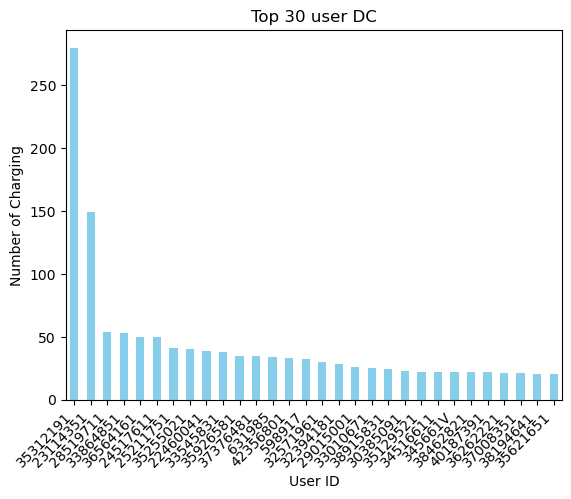

In [46]:
top_30_users_DC = value_counts_User_name_DC.sort_values(ascending=False).head(30)

figsize=(10, 6)
top_30_users_DC.plot(kind='bar', color='skyblue')
plt.title('Top 30 user DC')
plt.xlabel('User ID')
plt.ylabel('Number of Charging')
plt.xticks(rotation=45, ha='right')

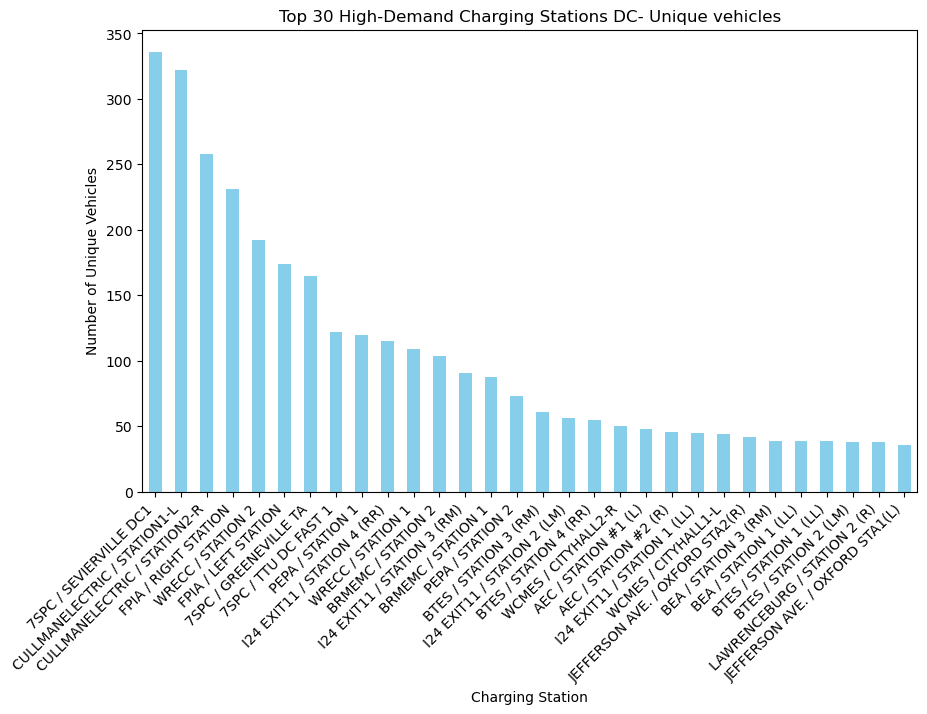

In [47]:
unique_vehicles_per_station_DC = df_DC.groupby('Station Name')['User ID'].nunique()
#print (unique_vehicles_per_station)

top_30_stations_DC = unique_vehicles_per_station_DC.sort_values(ascending=False).head(30)

# Plotting
plt.figure(figsize=(10, 6))
top_30_stations_DC.plot(kind='bar', color='skyblue')
plt.title('Top 30 High-Demand Charging Stations DC- Unique vehicles')
plt.xlabel('Charging Station')
plt.ylabel('Number of Unique Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()

# L2

In [48]:
value_counts_station_name_L2= df_L2["Station Name"].value_counts()
unique_values_column_station_name_L2 = df_L2['Station Name'].unique()
value_counts_User_name_L2= df_L2["User ID"].value_counts()


#print(value_counts_station_name_L2)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '39956041'),
  Text(1, 0, '36794241'),
  Text(2, 0, '31948601'),
  Text(3, 0, '32776001'),
  Text(4, 0, '26789031'),
  Text(5, 0, '345831V'),
  Text(6, 0, '21698361'),
  Text(7, 0, '34108791'),
  Text(8, 0, '2577471'),
  Text(9, 0, '31321161'),
  Text(10, 0, '27405401'),
  Text(11, 0, '28493451'),
  Text(12, 0, '19948981'),
  Text(13, 0, '35914251'),
  Text(14, 0, '33732041'),
  Text(15, 0, '30255411'),
  Text(16, 0, '36839191'),
  Text(17, 0, '35649101'),
  Text(18, 0, '41653461'),
  Text(19, 0, '30965751'),
  Text(20, 0, '25930191'),
  Text(21, 0, '23712821'),
  Text(22, 0, '36464281'),
  Text(23, 0, '30969821'),
  Text(24, 0, '611995'),
  Text(25, 0, '26479151'),
  Text(26, 0, '24639591'),
  Text(27, 0, '35873791'),
  Text(28, 0, '42073701'),
  Text(29, 0, '22457141')])

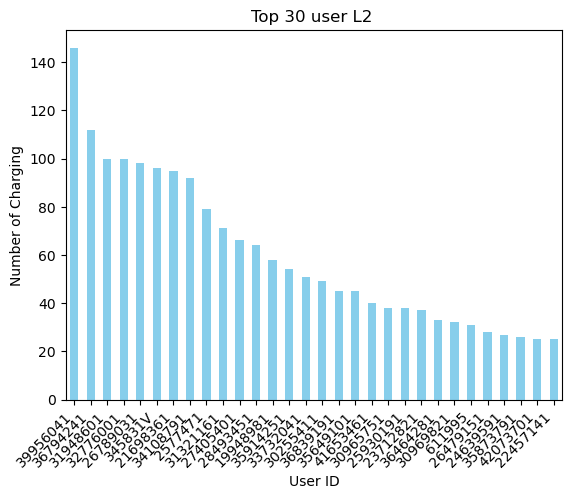

In [49]:
top_30_users_L2 = value_counts_User_name_L2.sort_values(ascending=False).head(30)

figsize=(10, 6)
top_30_users_L2.plot(kind='bar', color='skyblue')
plt.title('Top 30 user L2 ')
plt.xlabel('User ID')
plt.ylabel('Number of Charging')
plt.xticks(rotation=45, ha='right')

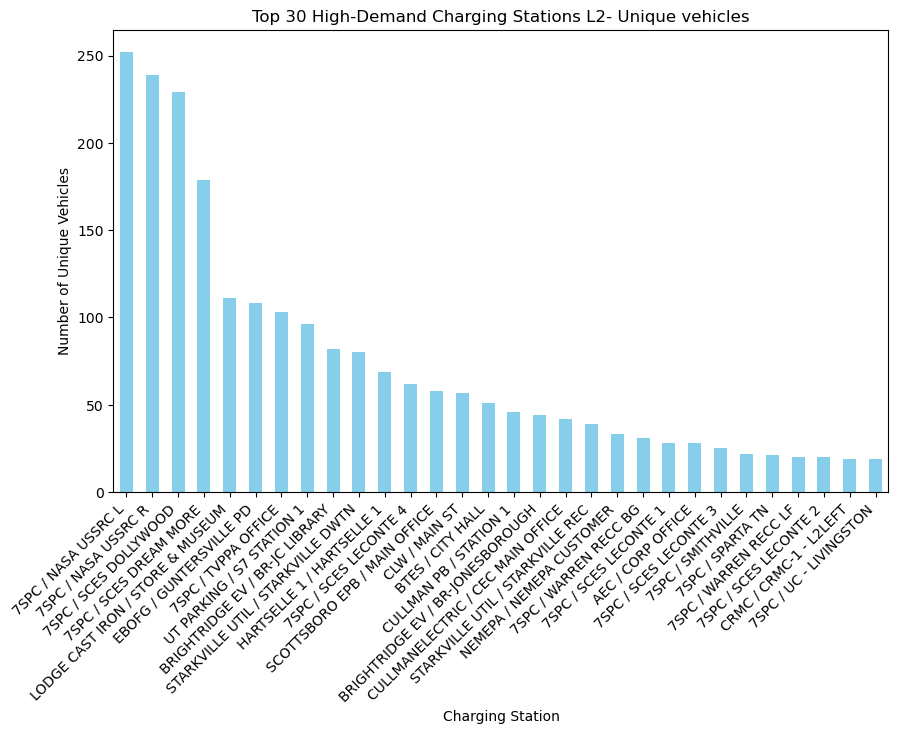

In [50]:
unique_vehicles_per_station_L2 = df_L2.groupby('Station Name')['User ID'].nunique()
#print (unique_vehicles_per_station)

top_30_stations_L2 = unique_vehicles_per_station_L2.sort_values(ascending=False).head(30)

# Plotting
plt.figure(figsize=(10, 6))
top_30_stations_L2.plot(kind='bar', color='skyblue')
plt.title('Top 30 High-Demand Charging Stations L2- Unique vehicles')
plt.xlabel('Charging Station')
plt.ylabel('Number of Unique Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()

# Perform a utilization analysis over time

Utilization analysis: Look at usage rates over time for each station - how often is it occupied, peak usage times, etc. This can help guide pricing, load balancing, and future expansion plans​.

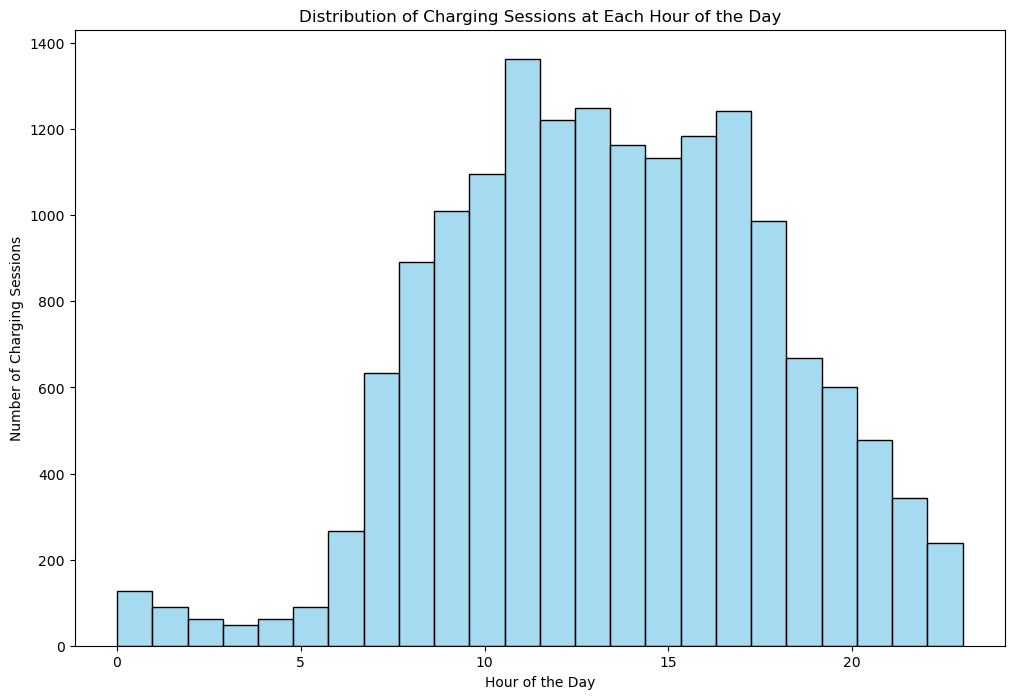

In [51]:
df['Start_Tim_EST'] = pd.to_datetime(df['Start_Time_EST'])
df['Hour'] = df['Start_Tim_EST'].dt.hour

plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Hour', bins=24, kde=False, color='skyblue')
plt.title('Distribution of Charging Sessions at Each Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Charging Sessions')
plt.show()

In [52]:
df['Month'] = df['Start_Tim_EST'].dt.month

# Grouping by Station Name and Month
utilization_by_month = df.groupby(['Station Name', 'Month']).size().reset_index(name='Charging Count')

TypeError: can only concatenate list (not "int") to list

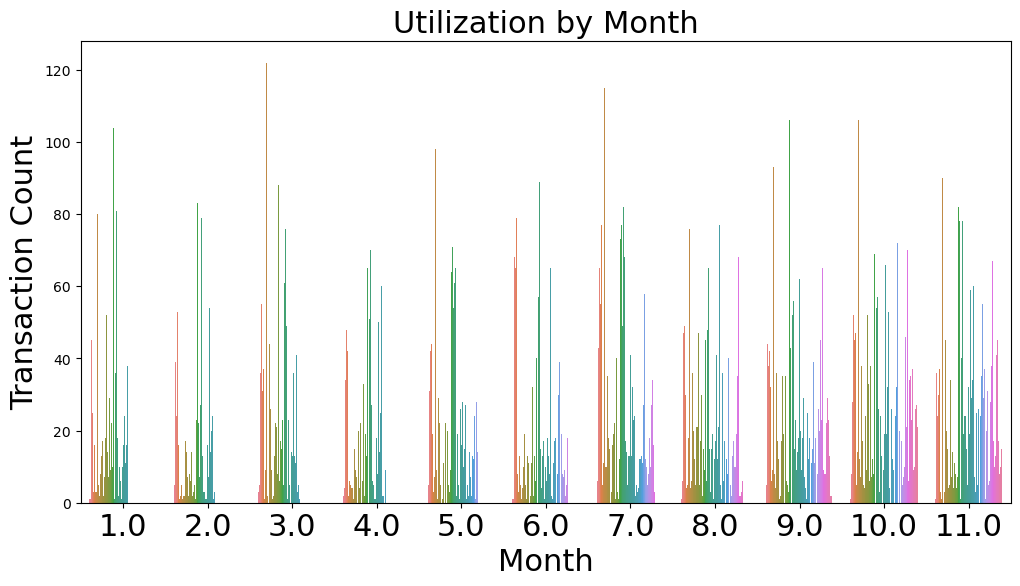

In [53]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Month', y='Charging Count', hue='Station Name', data=utilization_by_month)
plt.title('Utilization by Month', fontsize=22)  

ax.set_xlabel('Month', fontsize=22)
ax.set_ylabel('Transaction Count', fontsize=22)
ax.tick_params(axis='x', labelsize=22)
plt.legend().set_visible(False)
ax.set_xticklabels(ax.get_xticks() + 1)

plt.show()


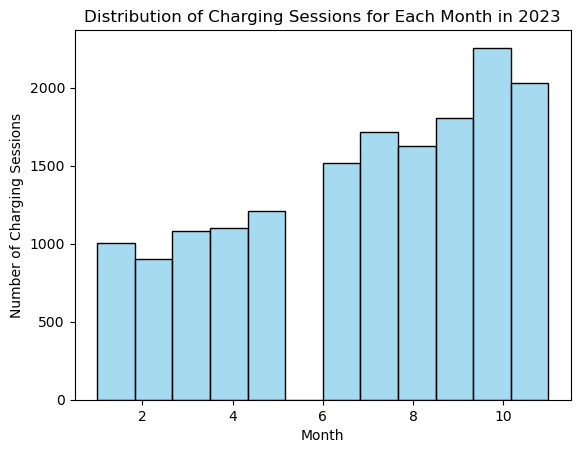

In [85]:
df['Month'] = df['Start_Tim_EST'].dt.month

#plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Month', bins=12, kde=False, color='skyblue')
plt.title('Distribution of Charging Sessions for Each Month in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Charging Sessions')
plt.show()

### L2

In [55]:
df_L2['Transaction Date (Pacific Time)'] = pd.to_datetime(df_L2['Transaction Date (Pacific Time)'])
df_L2['Hour'] = df_L2['Transaction Date (Pacific Time)'].dt.hour
utilization_data_L2 = df_L2.groupby(['Station Name', 'Hour']).size().reset_index(name='Transaction Count')


C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\50374706.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\50374706.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



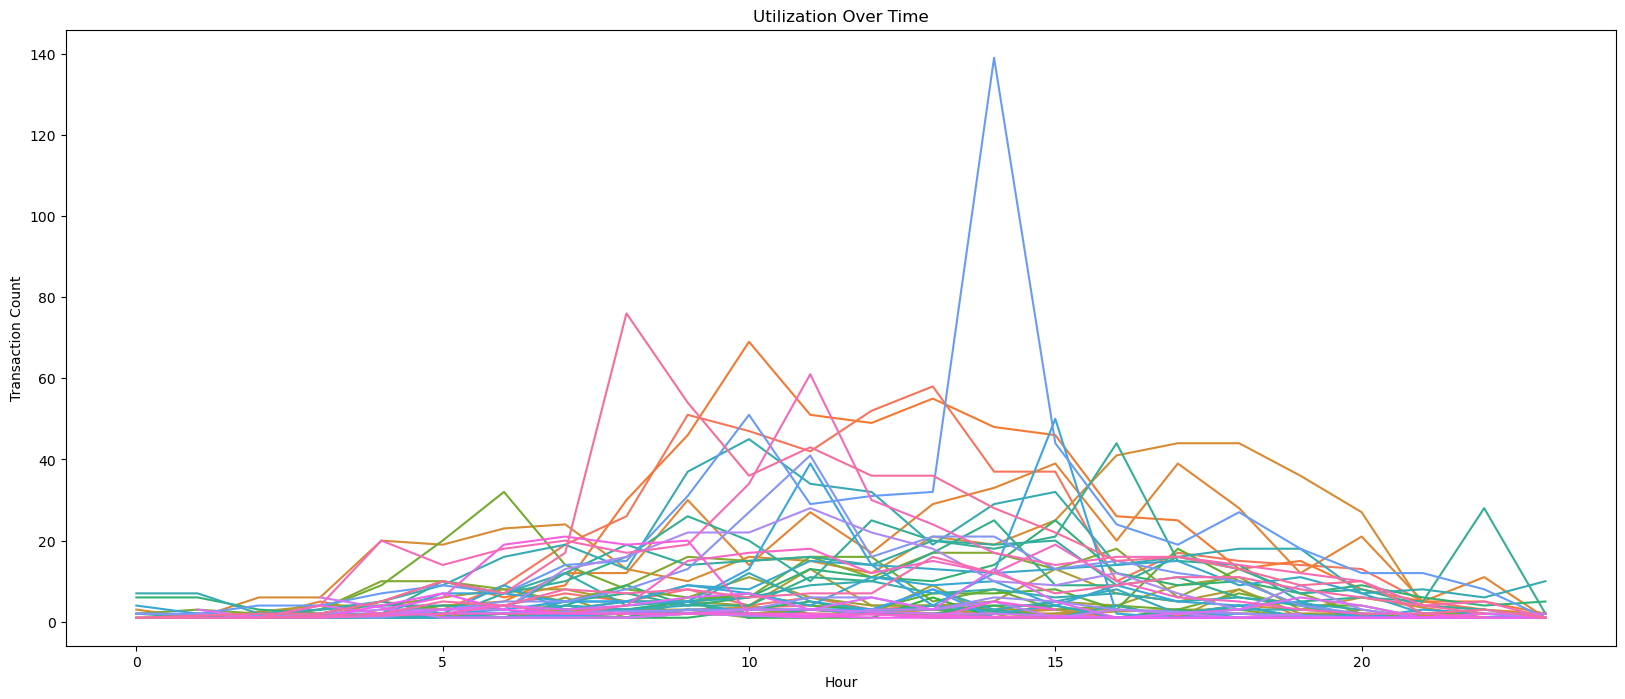

In [56]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='Hour', y='Transaction Count', hue='Station Name', data=utilization_data_L2,legend=False)
plt.title('Utilization Over Time')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
#plt.legend(title='Station Name')
plt.show()

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\32776357.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



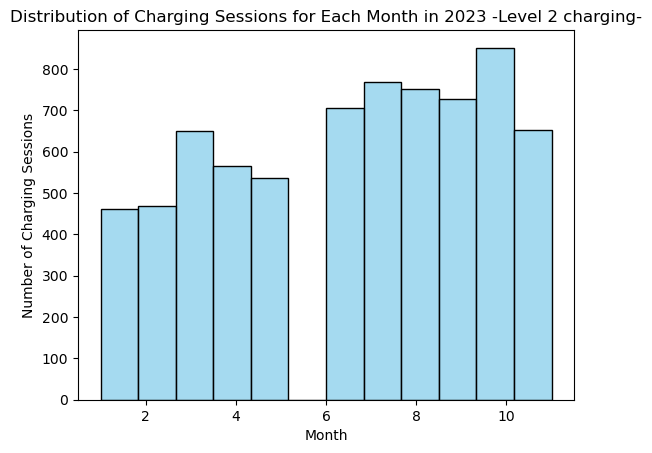

In [86]:
df_L2['Month'] = df_L2['Start_Tim_EST'].dt.month

#plt.figure(figsize=(12, 8))
sns.histplot(data=df_L2, x='Month', bins=12, kde=False, color='skyblue')
plt.title('Distribution of Charging Sessions for Each Month in 2023 -Level 2 charging-')
plt.xlabel('Month')
plt.ylabel('Number of Charging Sessions')
plt.show()

### DC fast 

In [57]:
df_DC['Transaction Date (Pacific Time)'] = pd.to_datetime(df_DC['Transaction Date (Pacific Time)'])
df_DC['Hour'] = df_DC['Transaction Date (Pacific Time)'].dt.hour
utilization_data_DC = df_DC.groupby(['Station Name', 'Hour']).size().reset_index(name='Transaction Count')

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\2943533406.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\2943533406.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
utilization_data_DC

Station Name  Hour  Transaction Count
0    7SPC / GREENEVILLE TA   0.0                  3
1    7SPC / GREENEVILLE TA   1.0                  1
2    7SPC / GREENEVILLE TA   2.0                  7
3    7SPC / GREENEVILLE TA   3.0                  5
4    7SPC / GREENEVILLE TA   4.0                  8
..                     ...   ...                ...
807      WRECC / STATION 2  19.0                 26
808      WRECC / STATION 2  20.0                 15
809      WRECC / STATION 2  21.0                 14
810      WRECC / STATION 2  22.0                 11
811      WRECC / STATION 2  23.0                  4

[812 rows x 3 columns]

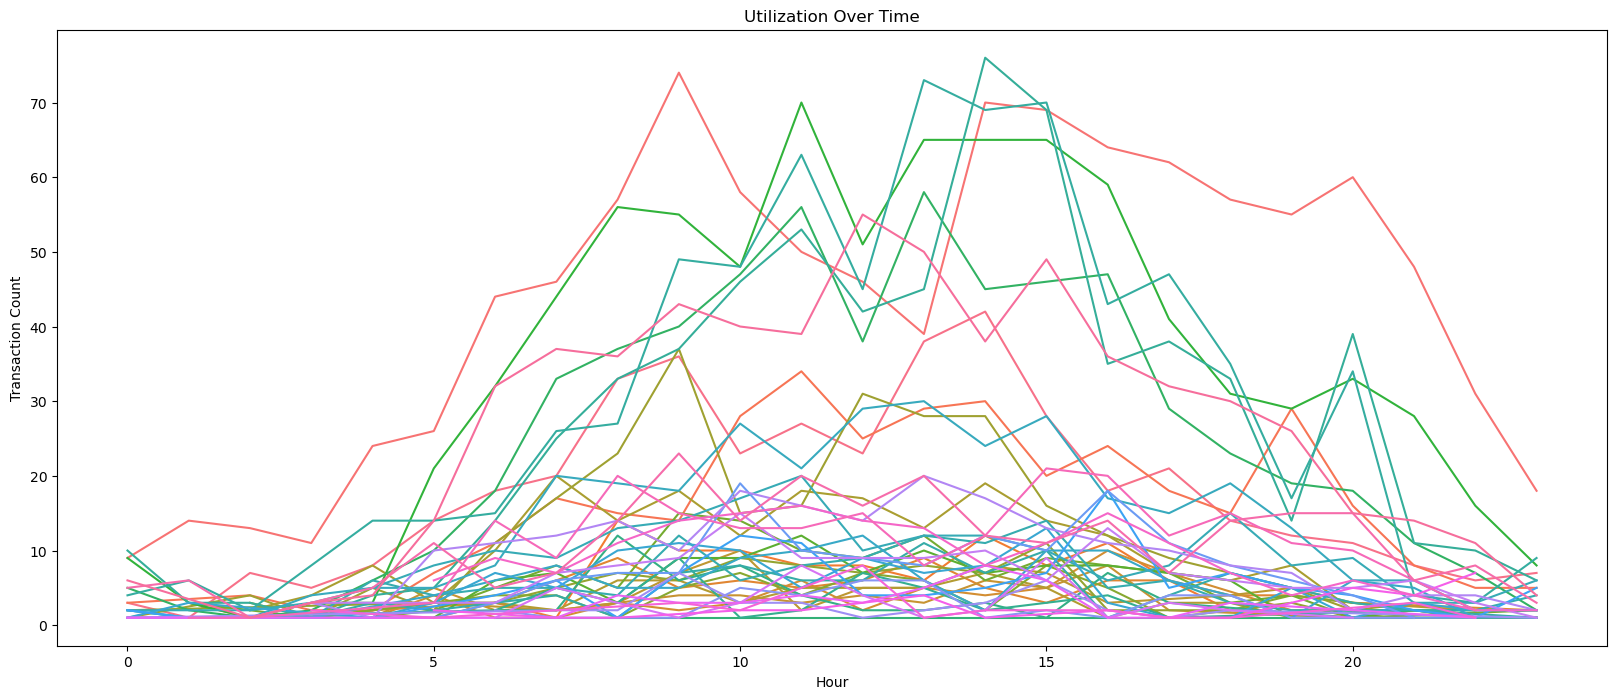

In [59]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='Hour', y='Transaction Count', hue='Station Name', data=utilization_data_DC, legend=False)
plt.title('Utilization Over Time')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
#plt.legend(title='Station Name')
plt.show()

C:\Users\mehdi\AppData\Local\Temp\ipykernel_18716\4136209683.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



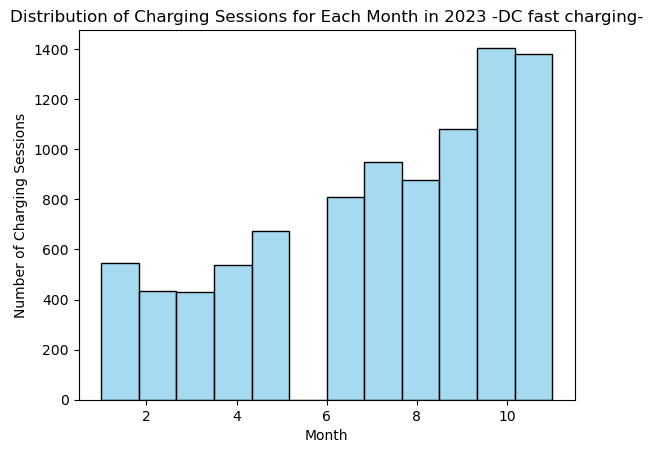

In [78]:
df_DC['Month'] = df_DC['Start_Tim_EST'].dt.month

#plt.figure(figsize=(12, 8))
sns.histplot(data=df_DC, x='Month', bins=12, kde=False, color='skyblue')
plt.title('Distribution of Charging Sessions for Each Month in 2023 -DC fast charging-')
plt.xlabel('Month')
plt.ylabel('Number of Charging Sessions')
plt.show()

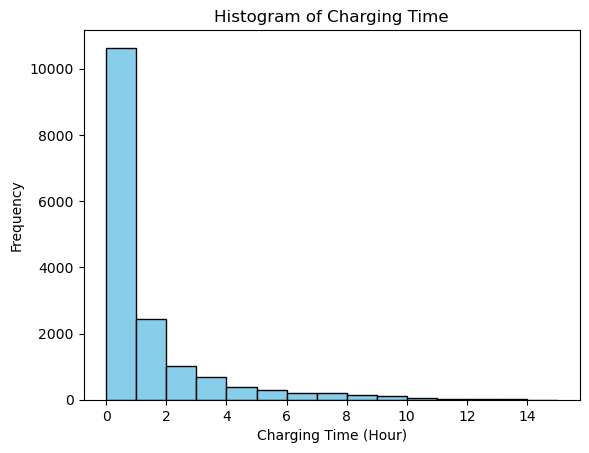

In [75]:

charging_time = df['Charging Time']

# Convert 'Charging Time' to timedelta
charging_time = pd.to_timedelta(charging_time)

# Convert timedelta to hour for easier visualization
charging_time_in_hours = charging_time.dt.total_seconds() / 3600

# Plot histogram
plt.hist(charging_time_in_hours, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], color='skyblue', edgecolor='black')
plt.title('Histogram of Charging Time')
plt.xlabel('Charging Time (Hour)')
plt.ylabel('Frequency')
plt.show()


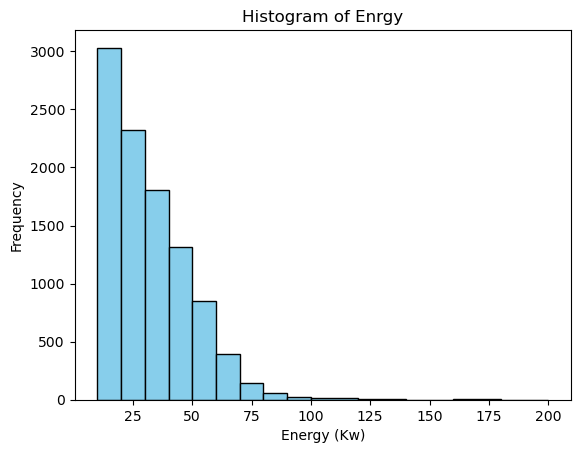

In [77]:
energy_kw = df['Energy (kWh)']
# Plot histogram
plt.hist(energy_kw, bins=[10,20,30,40,50,60,70,80,90,100,120,140,160,180,200], color='skyblue', edgecolor='black')
plt.title('Histogram of Enrgy')
plt.xlabel('Energy (Kw)')
plt.ylabel('Frequency')
plt.show()


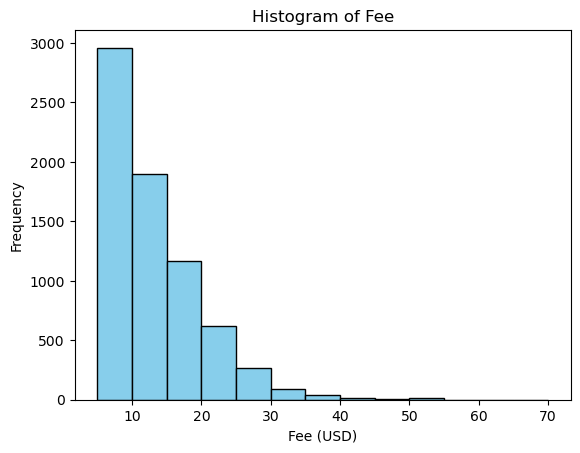

In [93]:
Fee_USD = df['Fee']
# Plot histogram
plt.hist(Fee_USD, bins=[5,10,15,20,25,30,35,40,45,50,55,60,65,70], color='skyblue', edgecolor='black')
plt.title('Histogram of Fee')
plt.xlabel('Fee (USD)')
plt.ylabel('Frequency')
plt.show()


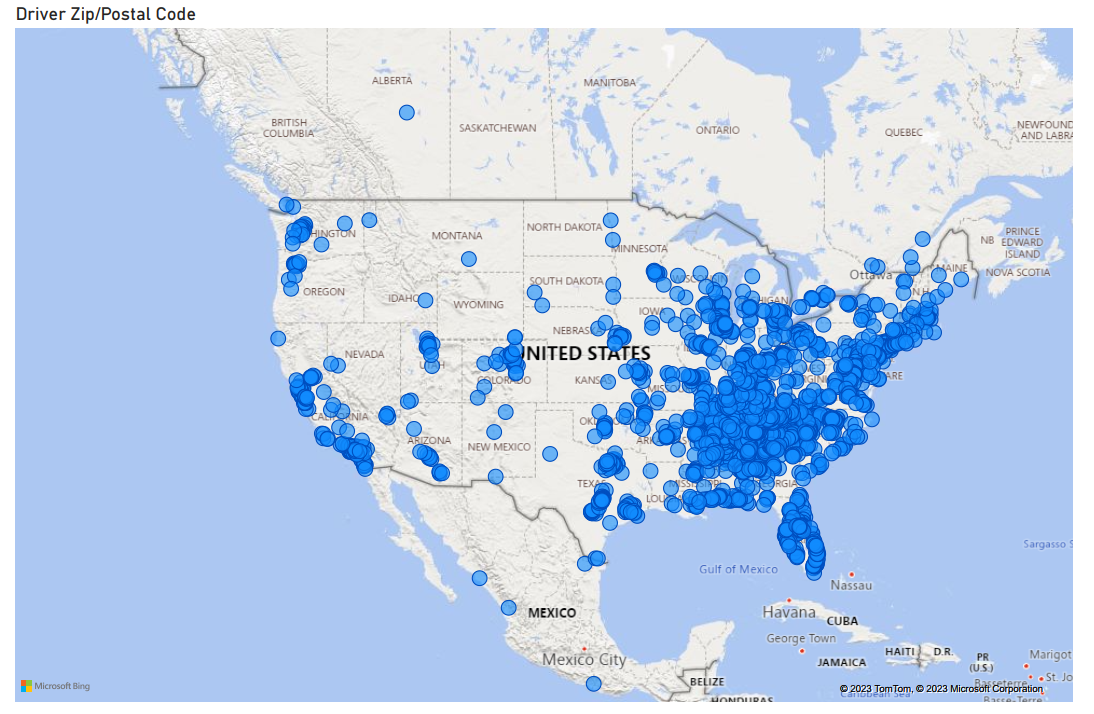


In [98]:
def vectorize_sequence(sequence, dimensions):
    results = np.zeros((len(sequence), dimensions))
    for index,value in enumerate(sequence):
        if max([value]) < dimensions:
            results[index, value] = 1
    return results

sequence = [2, 3, 1, 0]
vectorized_sequence = vectorize_sequence(sequence, 4)
print(vectorized_sequence)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]
